In [1]:
# """
# A module for obtaining repo readme and language data from the github API.

# Before using this module, read through it, and follow the instructions marked
# TODO.

# After doing so, run it like this:

#     python acquire.py

# To create the `data.json` file that contains the data.
# """
# import os
# import json
# from typing import Dict, List, Optional, Union, cast
# import requests

# from env import github_token, github_username

# # TODO: Make a github personal access token.
# #     1. Go here and generate a personal access token: https://github.com/settings/tokens
# #        You do _not_ need select any scopes, i.e. leave all the checkboxes unchecked
# #     2. Save it in your env.py file under the variable `github_token`
# # TODO: Add your github username to your env.py file under the variable `github_username`
# # TODO: Add more repositories to the `REPOS` list below.

# REPOS = [
#     "gocodeup/codeup-setup-script",
#     "gocodeup/movies-application",
#     "torvalds/linux", 'jtleek/datasharing',
#     'rdpeng/ProgrammingAssignment2',
#     'octocat/Spoon-Knife',
#     'SmartThingsCommunity/SmartThingsPublic',
#     'tensorflow/tensorflow',
#     'twbs/bootstrap',
#     'LSPosed/MagiskOnWSA',
#     'github/gitignore',
#     'Pierian-Data/Complete-Python-3-Bootcamp',
#     'nightscout/cgm-remote-monitor',
#     'jwasham/coding-interview-university',
#     'rdpeng/ExData_Plotting1',
#     'github/docs',
#     'opencv/opencv',
#     'EbookFoundation/free-programming-books',
#     'eugenp/tutorials',
#     'CyC2018/CS-Notes',
#     'tensorflow/models',
#     'jackfrued/Python-100-Days',
#     'firstcontributions/first-contributions',
#     'hitherejoe/BottomNavigationViewSample',
#     'J-Rios/TLG_JoinCaptchaBot',
#     'NeKosmic/NK-BOT',
#     'r7kamura/ruboty',
#     'MMMzq/bot_toast',
#     'SpEcHiDe/PyroGramBot',
#     'natario1/BottomSheetCoordinatorLayout',
#     'BilalShahid13/PersistentBottomNavBar',
#     'brucevanfdm/BottomNavigationView',
#     'jaisonfdo/BottomNavigation',
#     'germanattanasio/text-bot',
#     'hikaruAi/FacebookBot',
#     'xTCry/VCoin',
#     'NNTin/discord-twitter-bot',
#     'CharmingDays/kurusaki_voice',
#     'CrazyBotsz/Adv-Auto-Filter-Bot',
#     'paco0x/amm-arbitrageur',
#     'nysamnang/react-native-raw-bottom-sheet',
#     'fabston/TradingView-Webhook-Bot',
#     '546669204/RebateBot',
#     'topkecleon/telegram-bot-bash',
#     'evil-mad/EggBot',
#     'telegram-bot-rb/telegram-bot',
#     'alfficcadenti/splinterlands-bot',
#     'nodeWechat/wechat4u',
#     'tucnak/telebot',
#     'CarlGroth/Carl-Bot',
#     'grapeot/WechatForwardBot',
#     'googleworkspace/hangouts-chat-samples',
#     'GreyWolfDev/Werewolf',
#     'abdelhai/awesome-bots',
#     'mdgspace/bot',
#     'Sank6/Discord-Bot-List',
#     'samc621/SneakerBot',
#     'boto/boto3-sample',
#     'huseinzol05/Stock-Prediction-Models',
#     'SAPConversationalAI/Webchat',
#     'soumyadityac/youtube-viewer',
#     'CodeWithJoe2020/pancakeswapBot',
#     'Merubokkusu/discord-spam-bots',
#     'ZeroDiscord/EconomyBot',
#     'scrapinghub/slackbot',
#     'baidu/boteye',
#     'kcloze/swoole-bot',
#     'hyperchessbot/hyperbot',
#     'yangyuan/hearthrock',
#     'agermanidis/SnapchatBot',
#     'brompwnie/botb',
#     'thedevs-network/the-guard-bot',
#     'jqs7/Jqs7Bot',
#     'AdeelMufti/CryptoBot',
#     'aracred/bot',
#     'zeldaret/botw',
#     'jh0ker/mau_mau_bot',
#     'coq/bot',
#     'sandimetz/1st_99bottles_ruby',
#     'jsdelivr/bot',
#     'mgp25/Telegram-Bot-API',
#     'kereh/BOT',
#     'torvalds/linux',
#     'Snailclimb/JavaGuide',
#     'facebook/react',
#     'rdpeng/RepData_PeerAssessment1',
#     'spring-projects/spring-boot',
#     'jlord/patchwork',
#     'TheAlgorithms/Python',
#     'ant-design/ant-design',
#     'barryclark/jekyll-now',
#     'spring-projects/spring-framework',
#     'kubernetes/kubernetes',
#     'bitcoin/bitcoin',
#     'vuejs/vue',
#     'mrdoob/three.js',
#     'DataScienceSpecialization/courses',
#     'getify/You-Dont-Know-JS',
#     'freeCodeCamp/freeCodeCamp',
#     'angular/angular.js',
#     'kamranahmedse/developer-roadmap',
#     'PanJiaChen/vue-element-admin',
#     'sindresorhus/awesome',
#     'ohmyzsh/ohmyzsh',
#     'trekhleb/javascript-algorithms',
#     'flutter/flutter',
#     'TheAlgorithms/Python',
#     'chartjs/Chart.js',
#     'coder/code-server',
#     'nestjs/nest',
#     'yangshun/tech-interview-handbook',
#     'laravel/laravel',
#     'trimstray/the-book-of-secret-knowledge',
#     'ryanmcdermott/clean-code-javascript',
#     'gothinkster/realworld',
#     'vuejs/awesome-vue',
#     'tonsky/FiraCode',
#     'hakimel/reveal.js',
#     'angular/angular.js',
#     'reduxjs/redux',
#     'tailwindlabs/tailwindcss',
#     'ripienaar/free-for-dev',
#     'protocolbuffers/protobuf',
#     'shadowsocks/shadowsocks-windows',
#     'JetBrains/kotlin',
#     'yarnpkg/yarn',
#     'TryGhost/Ghost',
#     'square/retrofit',
#     'bradtraversy/design-resources-for-developers',
#     'vsouza/awesome-ios',
#     'iamkun/dayjs',
#     'google/googletest',
#     'projectdiscovery/nuclei-templates',
#     'digitalocean/nginxconfig.io',
#     'flutter/flutter',
#     'PaddlePaddle/PaddleOCR',
#     'flutter/pinball',
#     'wolfogre/go-pprof-practice',
#     'supabase/supabase',
#     'felipefialho/frontend-challenges',
#     'flutter/samples',
#     'alibaba/fastjson2',
#     'florinpop17/app-ideas',
#     'charmbracelet/bubbletea',
#     'huggingface/transformers',
#     'databricks-academy/data-engineering-with-databricks',
#     'hectorqin/reader',
#     'Azure/azure-rest-api-specs',
#     'terra-money/core',
#     'saltstack/salt',
#     'PKUFlyingPig/cs-self-learning',
#     'actions/virtual-environments',
#     'jojoldu/junior-recruit-scheduler',
#     'dotnet/aspnetcore',
#     'danielgindi/Charts',
#     'microsoft/unilm',
#     'jtleek/datasharing',
#     'rdpeng/ProgrammingAssignment2',
#     'octocat/Spoon-Knife',
#     'tensorflow/tensorflow',
#     'twbs/bootstrap',
#     'Pierian-Data/Complete-Python-3-Bootcamp',
#     'nightscout/cgm-remote-monitor',
#     'jwasham/coding-interview-university',
#     'rdpeng/ExData_Plotting1',
#     'github/docs',
#     'github/docs',
#     'opencv/opencv',
#     'EbookFoundation/free-programming-books',
#     'eugenp/tutorials',
#     'CyC2018/CS-Notes',
#     'jackfrued/Python-100-Days',
#     'firstcontributions/first-contributions',
#     'torvalds/linux',
#     'Snailclimb/JavaGuide',
#     'facebook/react',
#     'jlord/patchwork',
#     'TheAlgorithms/Python',
#     'ant-design/ant-design',
#     'barryclark/jekyll-now',
#     'bitcoin/bitcoin',
#     'angular/angular.js',
#     'kamranahmedse/developer-roadmap',
#     'PanJiaChen/vue-element-admin',
#     'django/django',
#     'mui/material-ui',
#     'kamranahmedse/developer-roadmap',
#     'PanJiaChen/vue-element-admin',
#     'DefinitelyTyped/DefinitelyTyped',
#     'django/django',
#     'mui/material-ui',
#     'RedHatTraining/DO180-apps',
#     'qmk/qmk_firmware',
#     'apache/spark',
#     'apache/dubbo',
#     'google/it-cert-automation-practice',
#     'facebook/create-react-app',
#     'airbnb/javascript',
#     'git/git',
#     'nodejs/node',
#     'sindresorhus/awesome',
#     'iluwatar/java-design-patterns',
#     'python/cpython',
#     'd3/d3',
#     'scikit-learn/scikit-learn',
#     'atralice/Curso.Prep.Henry',
#     'OCA/sale-workflow',
#     'forcedotcom/SalesforceMobileSDK-Android',
#     'appleseedhq/appleseed',
#     'jasondavies/d3-cloud',
#     'phpDocumentor/phpDocumentor',
#     'UZ-SLAMLab/ORB_SLAM3',
#     'ExtendRealityLtd/VRTK',
#     'gboeing/osmnx',
#     'luvit/luvit',
#     'jaredpalmer/razzle',
#     'howdyai/botkit',
#     'json-iterator/go',
#     'docker/labs',
#     'ionic-team/stencil',
#     'charmbracelet/bubbletea',
#     'jxnblk/mdx-deck',
#     'rovo89/Xposed',
#     'rauchg/slackin',
#     'axi0mX/ipwndfu',
#     'rshipp/awesome-malware-analysis',
#     'squeaky-pl/japronto',
#     'claudiodangelis/qrcp',
#     'codeguy/php-the-right-way',
#     'aristocratos/bpytop',
#     'php-fig/fig-standards',
#     'pyecharts/pyecharts',
#     'arangodb/arangodb',
#     'qmk/qmk_firmware',
#     'MaterialDesignInXAML/MaterialDesignInXamlToolkit',
#     'kubernetes-sigs/kubespray',
#     'mgonto/restangular',
#     'draveness/analyze',
#     'danialfarid/ng-file-upload',
#     'mathiasbynens/jquery-placeholder',
#     'makovkastar/FloatingActionButton',
#     'BVLC/caffe',
#     'apache/echarts',
#     'CSSEGISandData/COVID-19',
#     'jenkins-docs/simple-java-maven-app',
#     'vercel/next.js',
#     'home-assistant/core',
#     'moby/moby',
#     'ColorlibHQ/AdminLTE',
#     'scm-ninja/starter-web',
#     'xingshaocheng/architect-awesome',
#     'ArduPilot/ardupilot',
#     'codebasics/py',
#     'ageitgey/face_recognition',
#     'bailicangdu/vue2-elm',
#     'angular/angular-cli',
#     'kdn251/interviews',
#     'Trinea/android-open-project',
#     'zero-to-mastery/start-here-guidelines',
#     'FortAwesome/Font-Awesome',
#     'Homebrew/legacy-homebrew',
#     'jakevdp/PythonDataScienceHandbook',
#     'aymericdamien/TensorFlow-Examples',
#     'pallets/flask',
#     'github/opensource.guide',
#     'golang/go',
#     'TheOdinProject/css-exercises',
#     'selfteaching/the-craft-of-selfteaching',
#     'pandas-dev/pandas',
#     'ElemeFE/element',
#     'ionic-team/ionic-framework',
#     'doocs/advanced-java',
#     'MarlinFirmware/Marlin',
#     'shadowsocks/shadowsocks-windows',
#     'CoreyMSchafer/code_snippets',
#     'MicrosoftDocs/azure-docs',
#     'odoo/odoo',
#     'FreeRDP/FreeRDP',
#     'hakimel/reveal.js',
#     'gabrielecirulli/2048',
#     'udacity/course-collaboration-travel-plans',
#     'ossu/computer-science',
#     'jakevdp/PythonDataScienceHandbook',
#     'aymericdamien/TensorFlow-Examples',
#     'reduxjs/redux',
#     'pallets/flask',
#     'TheAlgorithms/Java',
#     'scutan90/DeepLearning-500-questions',
#     'huggingface/transformers',
#     'github/opensource.guide',
#     'golang/go',
#     'reduxjs/redux',
#     'pallets/flask',
#     'scutan90/DeepLearning-500-questions',
#     'huggingface/transformers',
#     'github/opensource.guide',
#     'golang/go',
#     'TheOdinProject/css-exercises',
#     'selfteaching/the-craft-of-selfteaching',
#     'netty/netty',
#     'Azure/azure-quickstart-templates'
# ]

# headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

# if headers["Authorization"] == "token " or headers["User-Agent"] == "":
#     raise Exception(
#         "You need to follow the instructions marked TODO in this script before trying to use it"
#     )


# def github_api_request(url: str) -> Union[List, Dict]:
#     response = requests.get(url, headers=headers)
#     response_data = response.json()
#     if response.status_code != 200:
#         print(f'error making request {url}')
#         raise Exception(
#             f"Error response from github api! status code: {response.status_code}, "
#             f"response: {json.dumps(response_data)}"
#         )
#     return response_data


# def get_repo_language(repo: str) -> str:
#     url = f"https://api.github.com/repos/{repo}"
#     repo_info = github_api_request(url)
#     if type(repo_info) is dict:
#         repo_info = cast(Dict, repo_info)
#         if "language" not in repo_info:
#             raise Exception(
#                 "'language' key not round in response\n{}".format(json.dumps(repo_info))
#             )
#         return repo_info["language"]
#     raise Exception(
#         f"Expecting a dictionary response from {url}, instead got {json.dumps(repo_info)}"
#     )


# def get_repo_contents(repo: str) -> List[Dict[str, str]]:
#     url = f"https://api.github.com/repos/{repo}/contents/"
#     contents = github_api_request(url)
#     if type(contents) is list:
#         contents = cast(List, contents)
#         return contents
#     raise Exception(
#         f"Expecting a list response from {url}, instead got {json.dumps(contents)}"
#     )


# def get_readme_download_url(files: List[Dict[str, str]]) -> str:
#     """
#     Takes in a response from the github api that lists the files in a repo and
#     returns the url that can be used to download the repo's README file.
#     """
#     for file in files:
#         if file["name"].lower().startswith("readme"):
#             return file["download_url"]
#     return ""


# def process_repo(repo: str) -> Dict[str, str]:
#     """
#     Takes a repo name like "gocodeup/codeup-setup-script" and returns a
#     dictionary with the language of the repo and the readme contents.
#     """
#     contents = get_repo_contents(repo)
#     readme_download_url = get_readme_download_url(contents)
#     if readme_download_url == "":
#         readme_contents = ""
#     else:
#         readme_contents = requests.get(readme_download_url).text
#     return {
#         "repo": repo,
#         "language": get_repo_language(repo),
#         "readme_contents": readme_contents,
#     }


# def scrape_github_data() -> List[Dict[str, str]]:
#     """
#     Loop through all of the repos and process them. Returns the processed data.
#     """
#     return [process_repo(repo) for repo in REPOS]


# if __name__ == "__main__":
#     data = scrape_github_data()
#     json.dump(data, open("data.json", "w"), indent=1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
import unicodedata
import re

import os
import acquire as a
import matt_prepare as p

from sklearn.model_selection import train_test_split

import time
import scipy.stats as stats

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# set default style for charts
plt.rc('figure', figsize=(13, 7))
plt.style.use('fivethirtyeight')
# change jupyter notebook setting to show all rows
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# df = pd.read_json('data.json')

In [4]:
# df.head()


In [5]:
# df.isnull().value_counts()

In [6]:
# df = df.dropna()

### Prepare the data...

In [7]:
# def basic_clean(string):
#     '''
#     This function takes in a string and
#     returns the string normalized.
#     '''
#     string = unicodedata.normalize('NFKD', string)\
#             .encode('ascii', 'ignore')\
#             .decode('utf-8', 'ignore')
#     string = re.sub(r'[^\w\s]', '', string).lower()
#     return string

# def tokenize(string):
#     '''
#     This function takes in a string and
#     returns a tokenized string.
#     '''
#     # Create tokenizer.
#     tokenizer = nltk.tokenize.ToktokTokenizer()
    
#     # Use tokenizer
#     string = tokenizer.tokenize(string, return_str = True)
    
#     return string

# def stem(string):
#     '''
#     This function takes in a string and
#     returns a string with words stemmed.
#     '''
#     # Create porter stemmer.
#     ps = nltk.porter.PorterStemmer()
    
#     # Use the stemmer to stem each word in the list of words we created by using split.
#     stems = [ps.stem(word) for word in string.split()]
    
#     # Join our lists of words into a string again and assign to a variable.
#     string = ' '.join(stems)
    
#     return string

# def lemmatize(string):
#     '''
#     This function takes in string for and
#     returns a string with words lemmatized.
#     '''
#     # Create the lemmatizer.
#     wnl = nltk.stem.WordNetLemmatizer()
    
#     # Use the lemmatizer on each word in the list of words we created by using split.
#     lemmas = [wnl.lemmatize(word) for word in string.split()]
    
#     # Join our list of words into a string again and assign to a variable.
#     string = ' '.join(lemmas)
    
#     return string

# def remove_stopwords(string, extra_words=[], exclude_words=[]):
#     '''
#     This function takes in a string, optional extra_words and exclude_words parameters
#     with default empty lists and returns a string.
#     '''
#     # Create stopword_list.
#     stopword_list = stopwords.words('english')
    
#     # Remove 'exclude_words' from stopword_list to keep these in my text.
#     stopword_list = set(stopword_list) - set(exclude_words)
    
#     # Add in 'extra_words' to stopword_list.
#     stopword_list = stopword_list.union(set(extra_words))

#     # Split words in string.
#     words = string.split()
    
#     # Create a list of words from my string with stopwords removed and assign to variable.
#     filtered_words = [word for word in words if word not in stopword_list]
    
#     # Join words in the list back into strings and assign to a variable.
#     string_without_stopwords = ' '.join(filtered_words)
    
#     return 

In [8]:
# df['clean'] = df.readme_contents.apply(basic_clean)
# tokenized_df = df.clean.apply(tokenize)
# df['stemmed'] = tokenized_df.apply(stem)
# df['lemmatized'] = tokenized_df.apply(lemmatize)
# df.head()

In [9]:
# # Create function for fully prepared data...

# def prep_readme_df(extra_words=[], exclude_words=[]):
#     '''
#     This function take in a df and the string name for a text column with 
#     option to pass lists for extra_words and exclude_words and
#     returns a df with the text article title, original text, stemmed text,
#     lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed.
#     '''

#     df = acquire.scrape_github_data()

#     df['clean'] = df['readme_contents'].astype(str).apply(basic_clean)\
#                             .apply(tokenize)\
#                             .apply(remove_stopwords, 
#                              extra_words=extra_words, 
#                              exclude_words=exclude_words)  
#     df['stemmed'] = df['clean'].apply(stem)
#     df['lemmatized'] = df['clean'].apply(lemmatize)

#     # Character and word counts
#     df = df.assign(character_count= df.lemmatized.str.len(), 
#                    word_count=df.lemmatized.str.split().apply(len))
    
#     return df

In [10]:
df = p.clean_df()
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,character_count,word_count
0,gocodeup/codeup-setup-script,Shell,# Codeup Setup Script\n\nSetup script for Code...,codeup setup script setup script codeup studen...,codeup setup script setup script codeup studen...,codeup setup script setup script codeup studen...,1062,119
1,gocodeup/movies-application,JavaScript,"# Movies Application\n\nFor this project, we w...",movies application project building single pag...,movi applic project build singl page movi appl...,movie application project building single page...,2888,411
2,torvalds/linux,C,Linux kernel\n============\n\nThere are severa...,linux kernel several guides kernel developers ...,linux kernel sever guid kernel develop user gu...,linux kernel several guide kernel developer us...,505,58
3,jtleek/datasharing,None,How to share data with a statistician\n=======...,share data statistician guide anyone needs sha...,share data statistician guid anyon need share ...,share data statistician guide anyone need shar...,8270,1061
4,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...,introduction second programming assignment req...,introduct second program assign requir write r...,introduction second programming assignment req...,2488,332


### Split the data...

In [11]:
def split_data(df):
    '''
    This function takes in a data frame and splits it appropriately in order
    to return a train with 56%, validate with 24%, and test with 20% of the
    original data frame.
    '''
    # Split with train being 80% and test being 20%. Stratify on target.
    train, test = train_test_split(df, test_size = .2, random_state = 123)
    # Split the remaining train into 70% train and 30% validate.
    train, validate = train_test_split(train, test_size = .3, random_state = 123)
    # Spiltting results in a split with 56% train, 24% validate, and 20% test data from original
    return train, validate, test


In [12]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,character_count,word_count
0,gocodeup/codeup-setup-script,Shell,# Codeup Setup Script\n\nSetup script for Code...,codeup setup script setup script codeup studen...,codeup setup script setup script codeup studen...,codeup setup script setup script codeup studen...,1062,119
1,gocodeup/movies-application,JavaScript,"# Movies Application\n\nFor this project, we w...",movies application project building single pag...,movi applic project build singl page movi appl...,movie application project building single page...,2888,411
2,torvalds/linux,C,Linux kernel\n============\n\nThere are severa...,linux kernel several guides kernel developers ...,linux kernel sever guid kernel develop user gu...,linux kernel several guide kernel developer us...,505,58
3,jtleek/datasharing,None,How to share data with a statistician\n=======...,share data statistician guide anyone needs sha...,share data statistician guid anyon need share ...,share data statistician guide anyone need shar...,8270,1061
4,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...,introduction second programming assignment req...,introduct second program assign requir write r...,introduction second programming assignment req...,2488,332


In [13]:
train, validate, test = split_data(df)
train.shape[0], validate.shape[0], test.shape[0]

(168, 72, 61)

### Explore the data...
(Addtional Exploration)

In [14]:
train.language.value_counts(dropna = False)

JavaScript          35
Python              27
NaN                 19
TypeScript          13
Java                13
C++                 10
HTML                 7
Go                   6
C                    5
Dart                 4
Vue                  3
Shell                3
CSS                  3
Jupyter Notebook     3
Rich Text Format     2
PHP                  2
R                    2
Swift                2
PowerShell           1
OCaml                1
Groovy               1
Scala                1
Kotlin               1
Solidity             1
Objective-C          1
C#                   1
Lua                  1
Name: language, dtype: int64

In [15]:
train.language.value_counts().head(5)

JavaScript    35
Python        27
TypeScript    13
Java          13
C++           10
Name: language, dtype: int64

In [16]:
# Lemmatize words for each language
python = ' '.join(train.lemmatized[train.language == 'Python'].astype(str))
javascript = ' '.join(train.lemmatized[train.language == 'JavaScript'].astype(str))
c = ' '.join(train.lemmatized[train.language == 'C#'].astype(str))
java = ' '.join(train.lemmatized[train.language == 'Java'].astype(str))
typescript = ' '.join(train.lemmatized[train.language == 'TypeScript'].astype(str))


In [17]:
# ngrams to make a list of bigrams by language
top10_python_bigrams = pd.Series(nltk.ngrams(python.split(), 2)).value_counts().head(10)
top10_javascript_bigrams = pd.Series(nltk.ngrams(javascript.split(), 2)).value_counts().head(10)
top10_c_bigrams = pd.Series(nltk.ngrams(c.split(), 2)).value_counts().head(10)
top10_java_bigrams = pd.Series(nltk.ngrams(java.split(), 2)).value_counts().head(10)
top10_typescript_bigrams = pd.Series(nltk.ngrams(typescript.split(), 2)).value_counts().head(10)


In [18]:
python_bi = pd.DataFrame(top10_python_bigrams).reset_index().rename(columns={'index':'python_bigrams', 0:'p_count'})
python_bi.head()

,python_bigrams,p_count
0,"(released, paper)",99
1,"(research, released)",22
2,"(salt, project)",18
3,"(ai, released)",16
4,"(facebook, released)",15


In [19]:
javascript_bi = pd.DataFrame(top10_javascript_bigrams).reset_index().rename(columns={'index':'javascript_bigrams', 0:'p_count'})
javascript_bi.head()

,javascript_bigrams,p_count
0,"(javascript, bad)",111
1,"(bad, const)",64
2,"(good, const)",59
3,"(since, last)",54
4,"(possible, value)",54


In [20]:
c_bi = pd.DataFrame(top10_c_bigrams).reset_index().rename(columns={'index':'c_bigrams', 0:'p_count'})
c_bi.head()

,c_bigrams,p_count
0,"(rule, generated)",4
1,"(whitelist, mode)",4
2,"(connected, directly)",3
3,"(blacklist, mode)",3
4,"(chinese, domain)",3


In [21]:
java_bi = pd.DataFrame(top10_java_bigrams).reset_index().rename(columns={'index':'java_bigrams', 0:'p_count'})
java_bi.head()

,java_bigrams,p_count
0,"(width100px, altbr)",199
1,"(td, aligncentera)",199
2,"(titlecodeatd, td)",123
3,"(tr, td)",32
4,"(width48, height48)",30


In [22]:
typescript_bi = pd.DataFrame(top10_java_bigrams).reset_index().rename(columns={'index':'typescript_bigrams', 0:'p_count'})
typescript_bi.head()

,typescript_bigrams,p_count
0,"(width100px, altbr)",199
1,"(td, aligncentera)",199
2,"(titlecodeatd, td)",123
3,"(tr, td)",32
4,"(width48, height48)",30


In [23]:
python_df = top10_python_bigrams.reset_index().rename(columns={'index':'bigram', 0:'count'}).assign(language = 'python').head(5)
javascript_df = top10_javascript_bigrams.reset_index().rename(columns={'index':'bigram', 0:'count'}).assign(language = 'javascript').head(5)
c_df = top10_c_bigrams.reset_index().rename(columns={'index':'bigram', 0:'count'}).assign(language = 'c#').head(5)
java_df = top10_java_bigrams.reset_index().rename(columns={'index':'bigram', 0:'count'}).assign(language = 'java').head(5)
typescript_df = top10_typescript_bigrams.reset_index().rename(columns={'index':'bigram', 0:'count'}).assign(language = 'typescript').head(5)
bigrams_df = python_df.append([javascript_df, c_df, java_df, typescript_df], ignore_index=True)
bigrams_df

,bigram,count,language
0,"(released, paper)",99,python
1,"(research, released)",22,python
2,"(salt, project)",18,python
3,"(ai, released)",16,python
4,"(facebook, released)",15,python
5,"(javascript, bad)",111,javascript
6,"(bad, const)",64,javascript
7,"(good, const)",59,javascript
8,"(since, last)",54,javascript
9,"(possible, value)",54,javascript


In [24]:
bigrams_df = bigrams_df.drop_duplicates()
bigrams_df 

,bigram,count,language
0,"(released, paper)",99,python
1,"(research, released)",22,python
2,"(salt, project)",18,python
3,"(ai, released)",16,python
4,"(facebook, released)",15,python
5,"(javascript, bad)",111,javascript
6,"(bad, const)",64,javascript
7,"(good, const)",59,javascript
8,"(since, last)",54,javascript
9,"(possible, value)",54,javascript


Text(0.5, 1.0, 'Top Bigrams for Each Language')

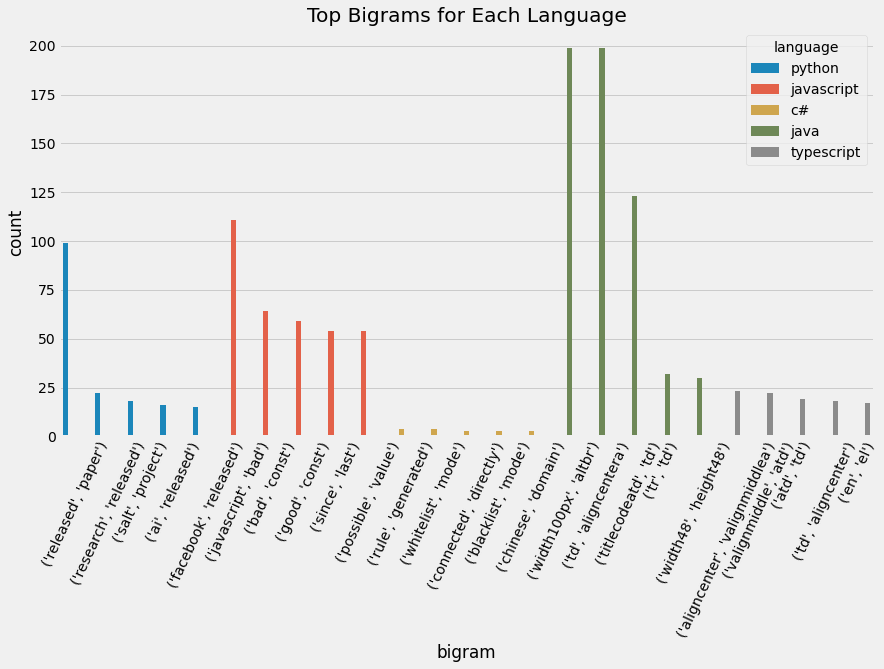

In [25]:
ax = sns.barplot(x='bigram', y='count', hue='language', data=bigrams_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=65)
plt.title('Top Bigrams for Each Language')

#### Is there any correlation between character and word count?

<AxesSubplot:xlabel='language'>

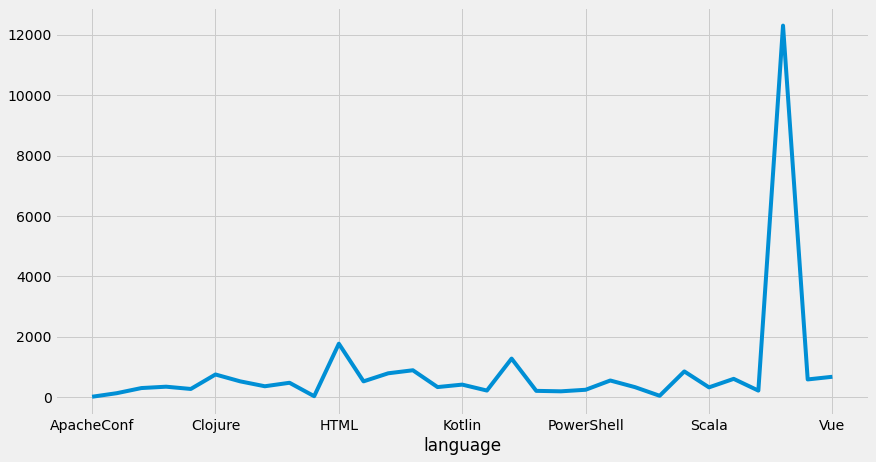

In [27]:
df.groupby('language').word_count.mean().plot()